<a href="https://colab.research.google.com/github/PJZoio/DocProduct/blob/master/Classification_(FTIR_NIR)_Doenca_Sem_preprocessamento_Inference_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (r2_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score, auc)
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import seaborn as sns
import pickle
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier #Import XGBClassifier
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
# Load the dataset
uploaded = files.upload()

Saving Compostas (Novas) - Espetros-Doenca.csv to Compostas (Novas) - Espetros-Doenca (2).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Compostas (Novas) - Espetros-Doenca (2).csv']), delimiter=';', encoding='latin-1')
print(data)

    Unnamed: 0        type  Doenca  Conc    12497,1   12495,17   12493,24  \
0        #1##1  Creatinine       0  0,71  0,3190747  0,3190013  0,3184121   
1        #1##2  Creatinine       0  0,71  0,3184985  0,3193123  0,3186378   
2        #1##3  Creatinine       0  0,71  0,3175368  0,3171732  0,3170539   
3        #1##4  Creatinine       0  0,71  0,3169154  0,3159791  0,3152222   
4        #1##5  Creatinine       0  0,71  0,3188727  0,3191647  0,3183154   
..         ...         ...     ...   ...        ...        ...        ...   
265     #54##1  Creatinine       1   6,6  0,2990442  0,2984389  0,2985225   
266     #54##2  Creatinine       1   6,6  0,3004497  0,3007593  0,3000701   
267     #54##3  Creatinine       1   6,6  0,2974475  0,2982265  0,2988065   
268     #54##4  Creatinine       1   6,6  0,2990757  0,2983191  0,2977589   
269     #54##5  Creatinine       1   6,6  0,2974968  0,2986111  0,2994829   

      12491,31   12489,38   12487,46  ...     4017,2   4015,271   4013,343 

In [ ]:
# Replace commas with periods in numeric columns
for column in data.columns:
  # Check if the column data type is 'object' (likely string) before applying str methods
   if data[column].dtype == 'object':
    # Try converting the column to numeric, errors='coerce' will replace invalid values with NaN
    data[column] = pd.to_numeric(data[column].str.replace(',', '.', regex=True), errors='coerce')
    # Now fill NaN values with 0. This is a simple choice, consider other imputation strategies if necessary
    data[column] = data[column].fillna(0)

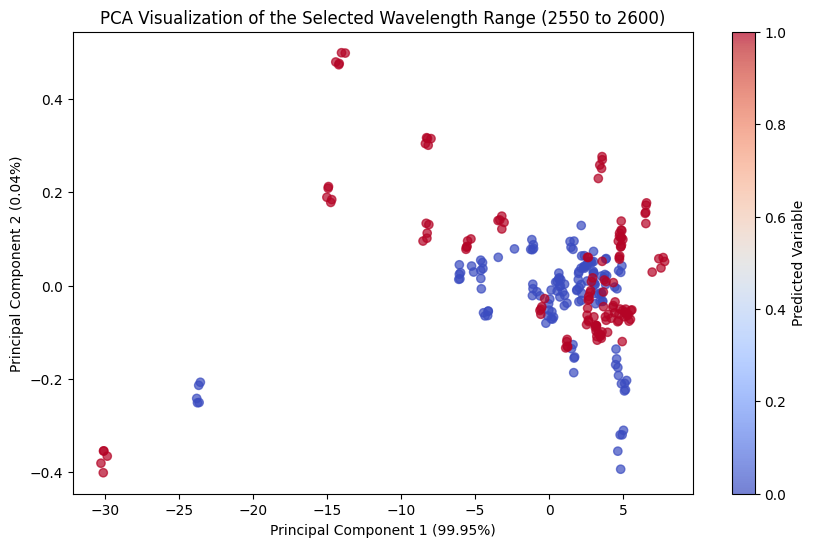

Random Forest - ROC AUC: 0.9639 (95% CI: 0.9228 - 0.9930)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:15:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - ROC AUC: 0.8960 (95% CI: 0.8142 - 0.9652)
Logistic Regression - ROC AUC: 0.5386 (95% CI: 0.4026 - 0.6741)


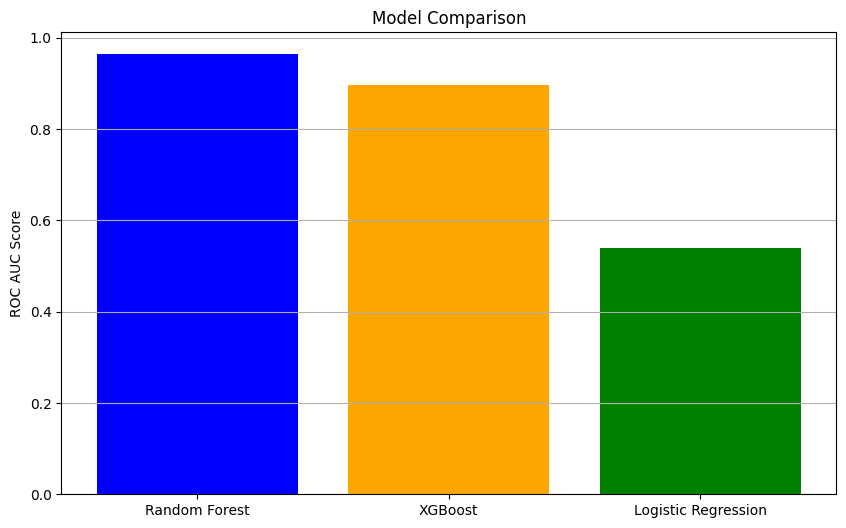

Random Forest Metrics:
  Selected Wavelength Range:
    train_accuracy: 1.0000
    train_precision: 1.0000
    train_recall: 1.0000
    train_f1: 1.0000
    train_specificity: 1.0000
    test_accuracy: 0.9012
    test_precision: 0.8750
    test_recall: 0.9211
    test_f1: 0.8974
    test_specificity: 0.8837

XGBoost Metrics:
  Selected Wavelength Range:
    train_accuracy: 1.0000
    train_precision: 1.0000
    train_recall: 1.0000
    train_f1: 1.0000
    train_specificity: 1.0000
    test_accuracy: 0.8395
    test_precision: 0.8571
    test_recall: 0.7895
    test_f1: 0.8219
    test_specificity: 0.8837

Logistic Regression Metrics:
  Selected Wavelength Range:
    train_accuracy: 0.5238
    train_precision: 0.5347
    train_recall: 0.5567
    train_f1: 0.5455
    train_specificity: 0.4891
    test_accuracy: 0.5062
    test_precision: 0.4737
    test_recall: 0.4737
    test_f1: 0.4737
    test_specificity: 0.5349


Summary of Model Performance:
                                       

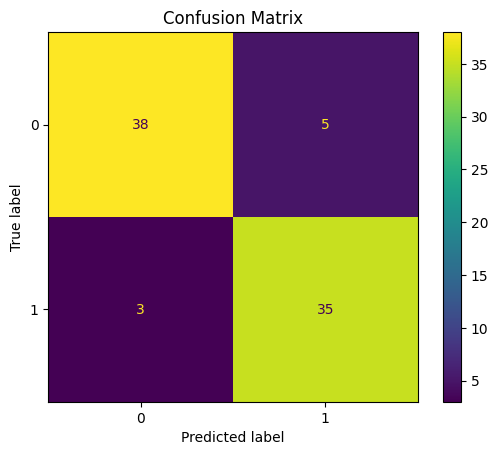

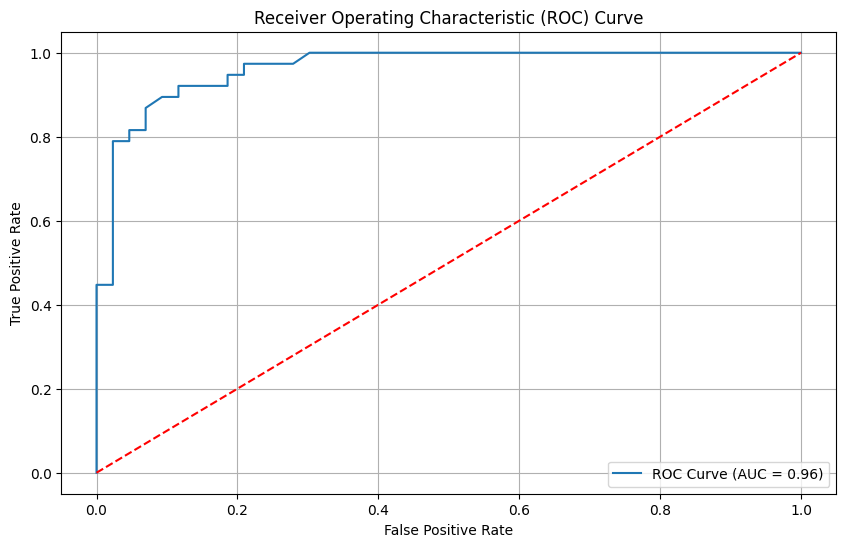

In [ ]:
# Extract the wavelengths (columns E to FMQ) and the target variable 'Doenca'
features = data.iloc[:, 4:-1]  # Wavelengths (columns E to FMQ)
target = data['Doenca']       # Target variable 'Doenca'

# Function to calculate specificity (simplified for binary classification)
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Function to select a specific wavelength range
def select_wavelength_range(features, start_col, end_col):
    return features.iloc[:, start_col:end_col]

# Function to train and evaluate the model
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)

    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Evaluation metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_specificity = specificity_score(y_train, y_train_pred)

    # Evaluation metrics for validation set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_specificity = specificity_score(y_test, y_test_pred)

    return {
        'train_accuracy': train_accuracy,
        'train_precision': train_precision,
        'train_recall': train_recall,
        'train_f1': train_f1,
        'train_specificity': train_specificity,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'test_specificity': test_specificity
    }

# Example: Select a specific wavelength range (e.g., columns 10 to 50)
start_col = 2550
end_col = 2600
features_selected = select_wavelength_range(features, start_col, end_col)

# We also need to subset the target variable to match the selected features
target_selected = target.iloc[features_selected.index]

# Perform PCA visualization on the selected wavelength range
scaler = StandardScaler()
features_selected_scaled = scaler.fit_transform(features_selected)  # Scale the selected features
pca = PCA(n_components=2)
pca_components_selected = pca.fit_transform(features_selected_scaled)  # Apply PCA to the selected features
explained_variance_selected = pca.explained_variance_ratio_ * 100

# Plot the PCA visualization for the selected wavelength range
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components_selected[:, 0], pca_components_selected[:, 1], c=target_selected, cmap='coolwarm', alpha=0.7)
plt.xlabel(f'Principal Component 1 ({explained_variance_selected[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance_selected[1]:.2f}%)')
plt.title(f'PCA Visualization of the Selected Wavelength Range ({start_col} to {end_col})')
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Variable')
plt.show()

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Cross-validation and model evaluation
cv_folds = 5
auc_scores = {}
models = {}
metrics_results = {}

# Scale the selected features
features_selected_scaled = scaler.fit_transform(features_selected)

# Split the selected wavelength data into training and validation sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(features_selected_scaled, target_selected, test_size=0.3, random_state=42)

# Now, use X_train_selected and X_test_selected for training and evaluation
for name, clf in classifiers.items():
    # Evaluate on the selected wavelength range
    selected_wavelength_metrics = train_and_evaluate(clf, X_train_selected, X_test_selected, y_train_selected, y_test_selected)

    # Store metrics
    metrics_results[name] = {
        'selected_wavelength': selected_wavelength_metrics
    }

    # ROC AUC for the selected wavelength range
    y_proba_selected = clf.predict_proba(X_test_selected)[:, 1]  # Only the positive class for binary classification
    roc_auc_selected = roc_auc_score(y_test_selected, y_proba_selected)
    auc_scores[name] = roc_auc_selected
    models[name] = clf

    # Bootstrapping for confidence interval
    bootstrapped_scores = []
    # Reset index for y_test_selected
    y_test_selected_reset = y_test_selected.reset_index(drop=True)
    for _ in range(1000):
        indices = np.random.randint(0, len(y_test_selected_reset), len(y_test_selected_reset))
        resampled_y_proba = clf.predict_proba(X_test_selected[indices])[:, 1]
        score = roc_auc_score(y_test_selected_reset[indices], resampled_y_proba)
        bootstrapped_scores.append(score)
    ci_lower, ci_upper = np.percentile(bootstrapped_scores, [2.5, 97.5])
    print(f"{name} - ROC AUC: {roc_auc_selected:.4f} (95% CI: {ci_lower:.4f} - {ci_upper:.4f})")

# Model comparison plot
plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color=['blue', 'orange', 'green'])
plt.ylabel("ROC AUC Score")
plt.title("Model Comparison")
plt.grid(axis='y')
plt.show()

# Print metrics for all models
for model_name, metrics in metrics_results.items():
    print(f"{model_name} Metrics:")
    print("  Selected Wavelength Range:")
    for metric, value in metrics['selected_wavelength'].items():
        print(f"    {metric}: {value:.4f}")
    print()

# Create a DataFrame for metrics summary
table_df = pd.DataFrame(metrics_results).T
print("\nSummary of Model Performance:")
print(table_df)

# Select the best model
best_model_name = max(auc_scores, key=auc_scores.get)
best_model = models[best_model_name]

# Predict and evaluate best model
y_pred = best_model.predict(X_test_selected)
y_proba = best_model.predict_proba(X_test_selected)[:, 1]  # Only the positive class for binary classification
accuracy = accuracy_score(y_test_selected, y_pred)
precision = precision_score(y_test_selected, y_pred)
recall = recall_score(y_test_selected, y_pred)
f1 = f1_score(y_test_selected, y_pred)
roc_auc = roc_auc_score(y_test_selected, y_proba)

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Save the best model
with open('best_model.pkl', 'wb') as file:
    pickle.dump((best_model, scaler), file)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_selected, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_selected, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the best model using the captured best_pls and best_scaler
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump((clf, scaler), file)

In [ ]:
loaded_model = pickle.load(open('best_rf_model.pkl','rb'))

In [ ]:
uploaded = files.upload()

Saving _Inferencias compostas (creatinina).csv to _Inferencias compostas (creatinina) (1).csv


In [ ]:
# Load new dataset for inference
inference_data = pd.read_csv('_Inferencias compostas (creatinina) (1).csv', delimiter=';', encoding='latin-1')

<ipython-input-43-01ccb1648578>:2: DtypeWarning: Columns (1704) have mixed types. Specify dtype option on import or set low_memory=False.
  inference_data = pd.read_csv('_Inferencias compostas (creatinina) (1).csv', delimiter=';', encoding='latin-1')


In [ ]:
# Replace commas with periods in numeric columns
for column in inference_data.columns:
    if inference_data[column].dtype == 'object':
        inference_data[column] = pd.to_numeric(inference_data[column].str.replace(',', '.'), errors='coerce').fillna(0)

# Extract features
inference_features = inference_data.reindex(columns=features.columns, fill_value=0)

inference_scaled = scaler.transform(inference_features)

# Predict
predicted_classes = clf.predict(inference_scaled)
predicted_proba = clf.predict_proba(inference_scaled)[:, 1]

# Append predictions
inference_data['Predicted_Class'] = predicted_classes
inference_data['Predicted_Proba'] = predicted_proba

# Save the resulting dataset
inference_data.to_csv('inference_results_classification.csv', index=False, sep=';')
print("Inference completed. Results saved to 'inference_results_classification.csv'.")

# Plot prediction probabilities
plt.figure(figsize=(10, 6))
sns.histplot(predicted_proba, bins=30, kde=True, color='blue', label='Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
files.download('inference_results_classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>